<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Les-imports-et-initialisations-des-variables" data-toc-modified-id="Les-imports-et-initialisations-des-variables-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Les imports et initialisations des variables</a></span></li><li><span><a href="#Utilitaires" data-toc-modified-id="Utilitaires-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Utilitaires</a></span></li><li><span><a href="#La-variation-en-temps-des-évaluations-et-du-CAB-par-client" data-toc-modified-id="La-variation-en-temps-des-évaluations-et-du-CAB-par-client-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>La variation en temps des évaluations et du CAB par client</a></span><ul class="toc-item"><li><span><a href="#a.----Les-clients-les-plus-rentables-dans-le-temps" data-toc-modified-id="a.----Les-clients-les-plus-rentables-dans-le-temps-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>a.    Les clients les plus rentables dans le temps</a></span><ul class="toc-item"><li><span><a href="#Les-10-premiers-clients-par-années" data-toc-modified-id="Les-10-premiers-clients-par-années-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Les 10 premiers clients par années</a></span></li></ul></li><li><span><a href="#b.-Les-clients-les-plus-contents-dans-le-temps" data-toc-modified-id="b.-Les-clients-les-plus-contents-dans-le-temps-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>b. Les clients les plus contents dans le temps</a></span><ul class="toc-item"><li><span><a href="#Les-2-premiers-clients-suivant-l'évaluation-par-années" data-toc-modified-id="Les-2-premiers-clients-suivant-l'évaluation-par-années-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Les 2 premiers clients suivant l'évaluation par années</a></span></li></ul></li><li><span><a href="#c.-Les-meilleures-notes-et-les-pires-dans-le-temps." data-toc-modified-id="c.-Les-meilleures-notes-et-les-pires-dans-le-temps.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>c. Les meilleures notes et les pires dans le temps.</a></span></li><li><span><a href="#d.-Les-villes-et-les-régions-les-plus-rentables-dans-le-temps." data-toc-modified-id="d.-Les-villes-et-les-régions-les-plus-rentables-dans-le-temps.-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>d. Les villes et les régions les plus rentables dans le temps.</a></span><ul class="toc-item"><li><span><a href="#d.-Les-régions-les-plus-rentables-dans-le-temps." data-toc-modified-id="d.-Les-régions-les-plus-rentables-dans-le-temps.-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>d. Les régions les plus rentables dans le temps.</a></span></li><li><span><a href="#d.-Les-villes-les-plus-rentables-dans-le-temps." data-toc-modified-id="d.-Les-villes-les-plus-rentables-dans-le-temps.-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>d. Les villes les plus rentables dans le temps.</a></span></li><li><span><a href="#Les-ventes-par-mois-et-région-dans-2017" data-toc-modified-id="Les-ventes-par-mois-et-région-dans-2017-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>Les ventes par mois et région dans 2017</a></span></li><li><span><a href="#Les-ventes-par-mois-et-région-dans-2018" data-toc-modified-id="Les-ventes-par-mois-et-région-dans-2018-3.4.4"><span class="toc-item-num">3.4.4&nbsp;&nbsp;</span>Les ventes par mois et région dans 2018</a></span></li><li><span><a href="#Les-ventes-ville-dans-l'état-Sao-Paulo-dans-l'année-2018" data-toc-modified-id="Les-ventes-ville-dans-l'état-Sao-Paulo-dans-l'année-2018-3.4.5"><span class="toc-item-num">3.4.5&nbsp;&nbsp;</span>Les ventes ville dans l'état Sao Paulo dans l'année 2018</a></span></li></ul></li></ul></li></ul></div>

# Les imports et initialisations des variables

In [1]:
from datetime import datetime
import pandas as pd, numpy as np, scipy.stats as st, os, warnings, seaborn as sns, pickle, re, unicodedata, six
from datetime import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.backends.backend_pdf import PdfPages

font1 = fm.FontProperties(size=20)
font2 = fm.FontProperties(size=24)

%matplotlib inline

if int(str(sns.__version__).split('.')[1]) > 8 : 
    plt.style.use('seaborn-v0_8-darkgrid')
else:
    plt.style.use('seaborn-darkgrid')
    
sns.set(font_scale=2)
warnings.filterwarnings(action="ignore")

# Utilitaires

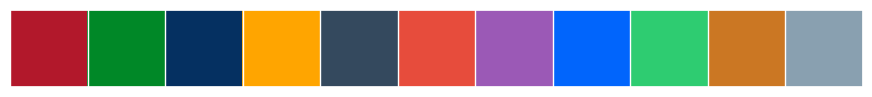

In [2]:
palette = [ "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973",
            "#f5054f", 
            "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973", "#d1e5f0", "#fddbc7",
            "#ffffcb", "#12e193", "#d8dcd6", "#ffdaf0", "#dfc5fe", "#f5054f", "#a0450e",
            "#0339f8", "#f4320c", "#fec615", "#017a79", "#85a3b2", "#fe2f4a", "#a00498", "#b04e0f",
            "#0165fc", "#ff724c", "#fddc5c", "#11875d", "#89a0b0", "#fe828c", "#cb00f5", "#b75203",
            "#0485d1", "#ff7855", "#fbeeac", "#0cb577", "#95a3a6", "#ffb7ce", "#c071fe", "#ca6b02",
            "#92c5de", "#f4a582", "#fef69e", "#18d17b", "#c5c9c7", "#ffcfdc", "#caa0ff", "#cb7723",
            "#d1e5f0", "#fddbc7", "#ffffcb", "#12e193", "#d8dcd6", "#ffdaf0", "#dfc5fe", "#d8863b",
            "#030764", "#be0119", "#dbb40c", "#005249", "#3c4142", "#cb0162", "#5d1451", "#653700",
            "#040348", "#67001f", "#b27a01", "#002d04", "#000000", "#a0025c", "#490648", "#3c0008"
          ]
palette = ['#b2182b','#008827','#053061','#ffa500', '#34495e', '#e74c3c', 
          '#9b59b6', '#0165fc','#2ecc71', '#cb7723', '#89a0b0']
sns.palplot(sns.color_palette(palette))

In [3]:
repertoireRacine  = '.'
nomProjet         = 'ProjetBrasil02'

repertoireProjet  = os.path.join(repertoireRacine, nomProjet)
repertoireDonnees = os.path.join(repertoireProjet, 'repertoire.donnees')
repertoireImages  = os.path.join(repertoireProjet, 'repertoire.images')

def controleExistenceRepertoire( repertoire, create_if_needed=True):
    """Voir si le répertoire existe. S'il n'existe pas il est créé."""
    path_exists = os.path.exists(repertoire)
    if path_exists:
        if not os.path.isdir(repertoire):
            raise Exception("Trouvé le nom  "+repertoire +" mais c'est un fichier, pas un répertoire")
            # return False
        return True
    if create_if_needed:
        os.makedirs(repertoire)
        
controleExistenceRepertoire(repertoireProjet);
controleExistenceRepertoire(repertoireDonnees);
controleExistenceRepertoire(repertoireImages);

pdf = PdfPages(os.path.join(repertoireImages,"La variation en temps du CAB.pdf"))

def sauvegarderImage( fichier, fichierPdf=pdf):
    """Enregistrez la figure. Appelez la méthode juste avant plt.show ()."""
    controleExistenceRepertoire(repertoireImages)
    plt.savefig(os.path.join(repertoireImages,
                             fichier+f"--{dt.now().strftime('%Y_%m_%d_%H.%M.%S')}.png"), 
                             dpi=600, 
                             bbox_inches='tight')
    fichierPdf.savefig()    

def sauvegarderImageSNS( sns_plot, fichier, fichierPdf=pdf):
    """Enregistrez la figure. Appelez la méthode juste avant plt.show ()."""
    controleExistenceRepertoire(repertoireImages)
    fig = sns_plot.get_figure()
    fig.savefig(os.path.join(repertoireImages,fichier+'.png'))
    fichierPdf.savefig()    

In [4]:
def render_mpl_table( data, 
                      col_width=3.0, 
                      row_height=0.625, 
                      font_size=14, 
                      header_color='#40466e', 
                      row_colors=['#f1f1f2', 'w'], 
                      edge_color='w', 
                      bbox=[0, 0, 1, 1], 
                      header_columns=0, 
                      ndec = 2,
                      fichierPdf = None,
                      titre='',
                      ax=None, **kwargs): 
    if ax is None: 
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height]) 
        fig, ax = plt.subplots(figsize=size) 
        ax.axis('off') 
    
    plt.title(titre, fontsize = 32);
    
    mpl_table = ax.table(cellText=data.values.round(ndec), bbox=bbox, colLabels=data.columns, **kwargs) 

    mpl_table.auto_set_font_size(False) 
    mpl_table.set_fontsize(font_size) 

    for k, cell in six.iteritems(mpl_table._cells): 
        cell.set_edgecolor(edge_color) 
        if k[0] == 0 or k[1] < header_columns: 
            cell.set_text_props(weight='bold', color='w') 
            cell.set_facecolor(header_color) 
        else: 
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ]) 
    if fichierPdf is not None :
        fichierPdf.savefig()       
    return ax 

<img src="https://raw.githubusercontent.com/rbizoi/PythonFormationCESI/main/images/e-brasil.png" width="850">

In [5]:
dirname='../donnees/ecommerce'
fichiers = {}
for filename in os.listdir(dirname):
    print(os.path.join(dirname, filename))
    fichiers[filename] = pd.read_parquet(os.path.join(dirname, filename))

../donnees/ecommerce/order_items
../donnees/ecommerce/sellers
../donnees/ecommerce/order_payments
../donnees/ecommerce/order_reviews
../donnees/ecommerce/geolocation
../donnees/ecommerce/customers
../donnees/ecommerce/products
../donnees/ecommerce/orders


# La variation en temps des évaluations et du CAB par client

<img src="https://raw.githubusercontent.com/rbizoi/Ecole-IA-Strasbourg/master/images/documents/e-brasil02.png" width="800">

In [6]:
donnees = fichiers['orders'].merge(fichiers['order_reviews'],on='order_id'
                                  ).merge(fichiers['order_payments'],on='order_id'
                                         ).merge(fichiers['customers'],on='customer_id')

In [7]:
donnees.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_1', 'review_2', 'review_3', 'review_4', 'review_5', 'answer1',
       'answer2', 'answer3', 'answer4', 'answer5', 'comment_message1',
       'comment_message2', 'comment_message3', 'comment_message4',
       'comment_message5', 'creation1', 'creation2', 'creation3', 'creation4',
       'creation5', 'installments_boleto', 'installments_credit_card',
       'installments_debit_card', 'installments_voucher', 'value_boleto',
       'value_credit_card', 'value_debit_card', 'value_voucher',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state'],
      dtype='object')

In [8]:
donnees['annee']           = donnees.order_purchase_timestamp.dt.year
donnees['mois']            = donnees.order_purchase_timestamp.dt.month
donnees['annee_mois']      = donnees.order_purchase_timestamp.dt.year*100 + donnees.order_purchase_timestamp.dt.month
donnees['jour']            = donnees.order_purchase_timestamp.dt.day
donnees['annee_jour']      = donnees.order_purchase_timestamp.dt.month*1000 + donnees.order_purchase_timestamp.dt.day
donnees['jour_semaine']    = donnees.order_purchase_timestamp.dt.day_of_week
donnees['trimestre']       = donnees.order_purchase_timestamp.dt.quarter
donnees['annee_trimestre'] = donnees.order_purchase_timestamp.dt.month*10 + donnees.order_purchase_timestamp.dt.quarter
donnees['semaine']         = donnees.order_purchase_timestamp.dt.isocalendar().week
donnees['annee_semaine']   = donnees.order_purchase_timestamp.dt.month*100 + donnees.order_purchase_timestamp.dt.isocalendar().week
donnees['heure']           = donnees.order_purchase_timestamp.dt.hour

donnees['approuvee']       = donnees.order_approved_at - donnees.order_purchase_timestamp
donnees['envoyee'  ]       = donnees.order_delivered_carrier_date - donnees.order_purchase_timestamp
donnees['livree'   ]       = donnees.order_delivered_customer_date - donnees.order_purchase_timestamp
donnees['estimee'  ]       = donnees.order_estimated_delivery_date - donnees.order_purchase_timestamp

donnees['approuvee']       = donnees['approuvee'].dt.components.days + donnees['approuvee'].dt.components.hours/100
donnees['envoyee'  ]       = donnees['envoyee'  ].dt.components.days + donnees['envoyee'  ].dt.components.hours/100
donnees['livree'   ]       = donnees['livree'   ].dt.components.days + donnees['livree'   ].dt.components.hours/100
donnees['estimee'  ]       = donnees['estimee'  ].dt.components.days + donnees['estimee'  ].dt.components.hours/100
      
donnees['ca'  ]            = donnees.value_boleto+donnees.value_credit_card+donnees.value_debit_card+donnees.value_voucher  
donnees['notetotale'  ]    = donnees.review_1 + donnees.review_2*2 + donnees.review_3*3 + donnees.review_4*4 + donnees.review_5*5  
donnees['ville']           = donnees.customer_city.map(lambda x : str(x).capitalize())
donnees['etat']            = donnees.customer_city.map(lambda x : str(x).upper())

In [9]:
donnees.shape

(99437, 59)

In [10]:
d_jours = {1:"lundi",2:"mardi",3:"mercredi",4:"jeudi",5:"vendredi",6:"samedi",7:"dimanche"}
d_mois  = {1:"janvier",2:"février",3:"mars",4:"avril",5:"mai",6:"juin",7:"juillet",8:"août",9:"septembre",10:"octobre",11:"novembre",12:"décembre"}
listeJours = ["lundi","mardi","mercredi","jeudi","vendredi","samedi","dimanche"]
listeMois = ["janvier","février","mars","avril","mai","juin","juillet","août","septembre","octobre","novembre","décembre"]

In [11]:
dictEtats = {'AC':'Acre',              
             'AL':'Alagoas',
             'AP':'Amapá',
             'AM':'Amazonas',
             'BA':'Bahia',
             'CE':'Ceará',
             'ES':'Espírito Santo',
             'GO':'Goiás',
             'MA':'Maranhão',
             'MT':'Mato Grosso',
             'MS':'Mato Grosso do Sul', 
             'MG':'Minas Gerais',
             'PA':'Pará',
             'PB':'Paraïba',
             'PR':'Paraná',
             'PE':'Pernambouc',
             'PI':'Piauí',
             'RJ':'Rio de Janeiro',
             'RN':'Rio Grande do Norte',  
             'RS':'Rio Grande do Sul',
             'RO':'Rondônia',
             'RR':'Roraima',
             'SC':'Santa Catarina',
             'SP':'São Paulo',
             'SE':'Sergipe',
             'TO':'Tocantins',
             'DF':'District fédéral'} 
customer_id = {cli:i for i,cli in enumerate(donnees.sort_values('customer_unique_id').customer_unique_id.unique())}
# donnees['etat'] = donnees.etat.apply(lambda x: dictEtats[x])
donnees['client'] = donnees.customer_unique_id.apply(lambda x: customer_id[x])

In [12]:
donnees.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 157
order_delivered_carrier_date     1780
order_delivered_customer_date    2962
order_estimated_delivery_date       0
review_1                            0
review_2                            0
review_3                            0
review_4                            0
review_5                            0
answer1                             0
answer2                             0
answer3                             0
answer4                             0
answer5                             0
comment_message1                    0
comment_message2                    0
comment_message3                    0
comment_message4                    0
comment_message5                    0
creation1                           0
creation2                           0
creation3                           0
creation4   

In [13]:
donnees.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_1,review_2,...,heure,approuvee,envoyee,livree,estimee,ca,notetotale,ville,etat,client
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0,0,...,10,0.00,2.08,8.10,15.13,28.415,4,Sao paulo,SAO PAULO,46727
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,0,0,...,20,1.06,1.17,13.18,19.03,141.460,4,Barreiras,BARREIRAS,65826
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0,0,...,8,0.00,0.05,9.09,26.15,179.120,5,Vianopolis,VIANOPOLIS,22015
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0,0,...,19,0.00,3.18,13.05,26.04,72.200,5,Sao goncalo do amarante,SAO GONCALO DO AMARANTE,46674
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0,0,...,21,0.01,0.22,2.20,12.02,28.620,5,Santo andre,SANTO ANDRE,43055


##  a.	Les clients les plus rentables dans le temps

In [14]:
df01 = donnees[donnees.order_status == 'delivered'].groupby(['annee','client']).agg({'ca':np.sum,'order_id':'count'}).rename(columns={'order_id':'nb_commandes'}).reset_index()
df01.head()

,annee,client,ca,nb_commandes
0,2016,74,144.94,1
1,2016,736,784.80,1
2,2016,2331,971.96,1
3,2016,2527,196.27,1
4,2016,3103,267.49,1


In [15]:
df01['CA_R']      = df01.groupby(['annee']).ca.rank(method='dense',ascending=False).astype('int16')
df01['CA_pct_R']  = (df01.groupby(['annee']).ca.rank(pct=True,ascending=False)*100).round(4)

### Les 10 premiers clients par années

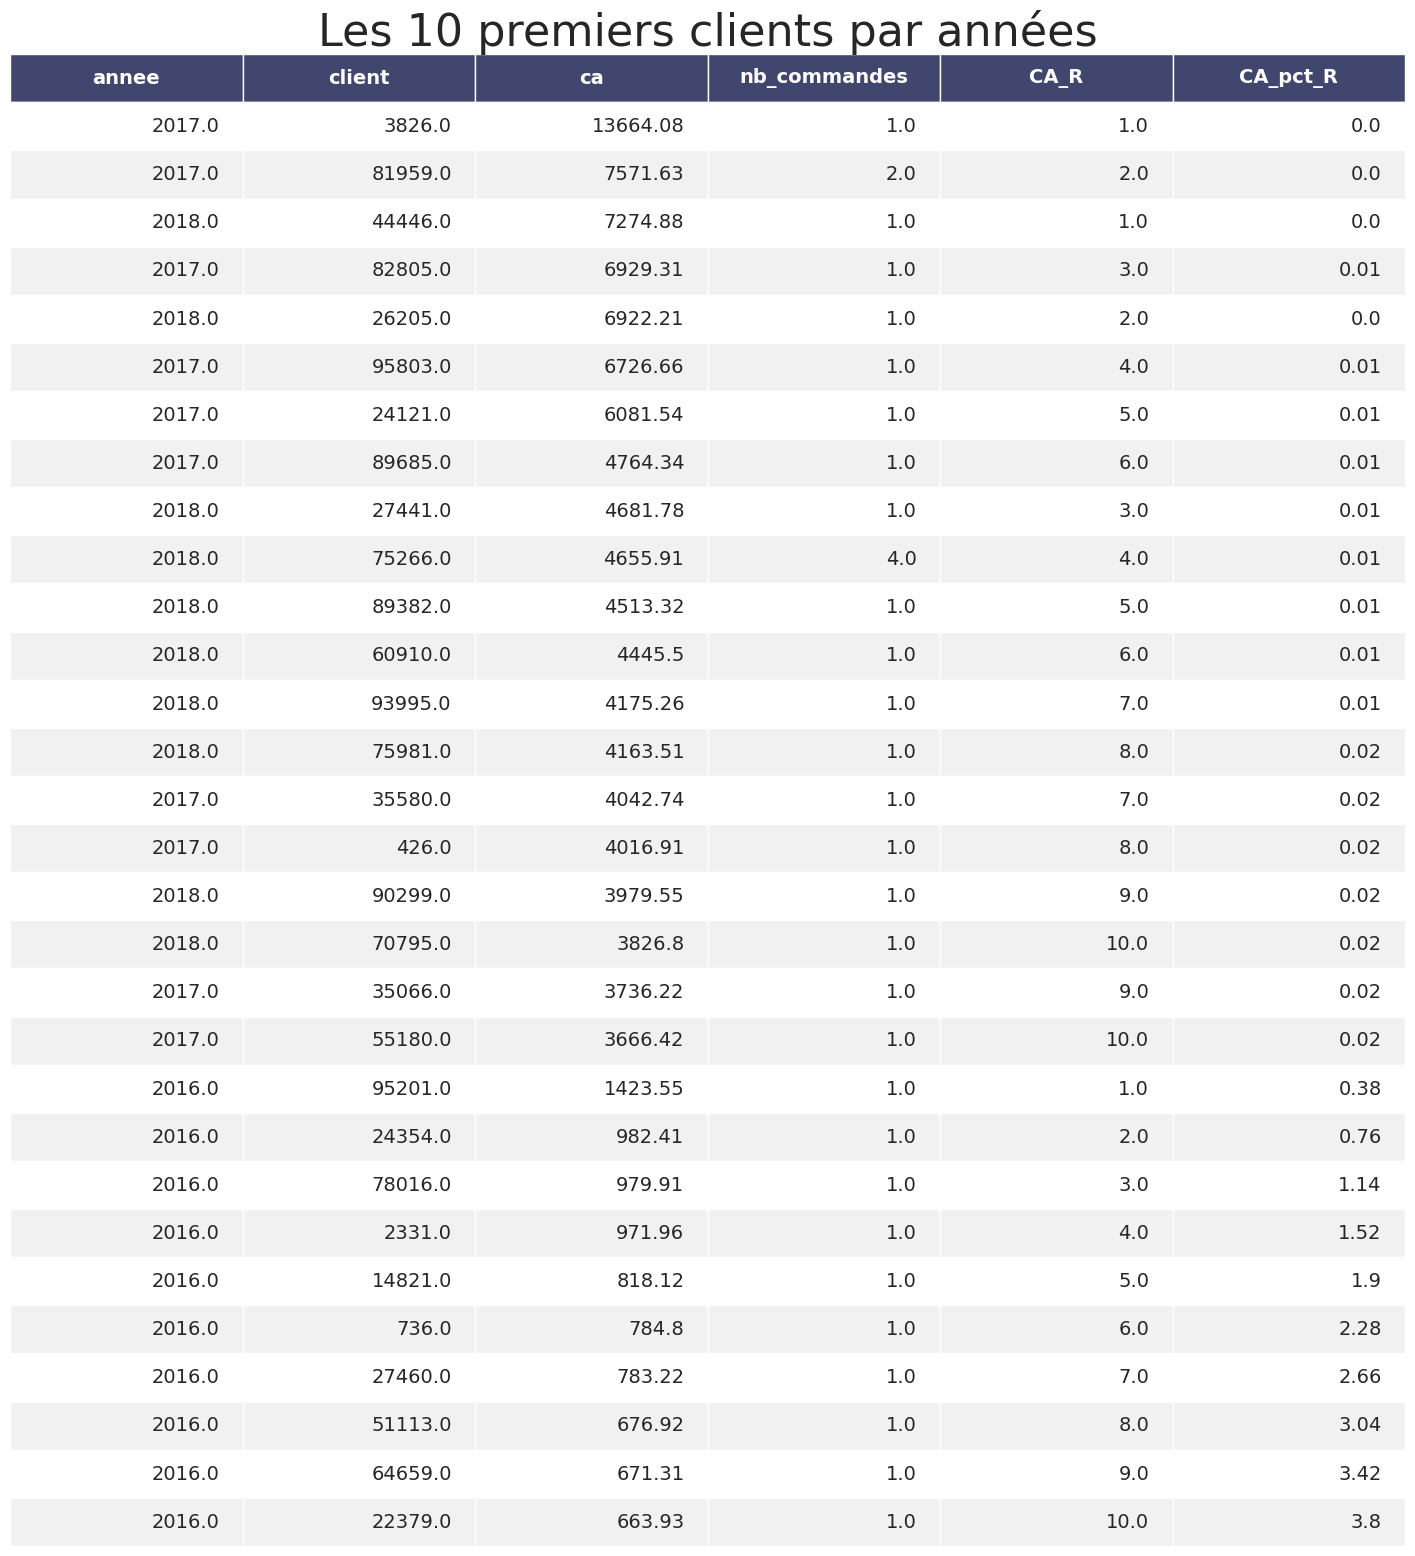

In [16]:
render_mpl_table(df01.sort_values('ca',ascending=False)[df01.CA_R < 11], 
                 header_columns=0, 
                 col_width=3.0, 
                 fichierPdf = pdf,
                 titre= "Les 10 premiers clients par années");

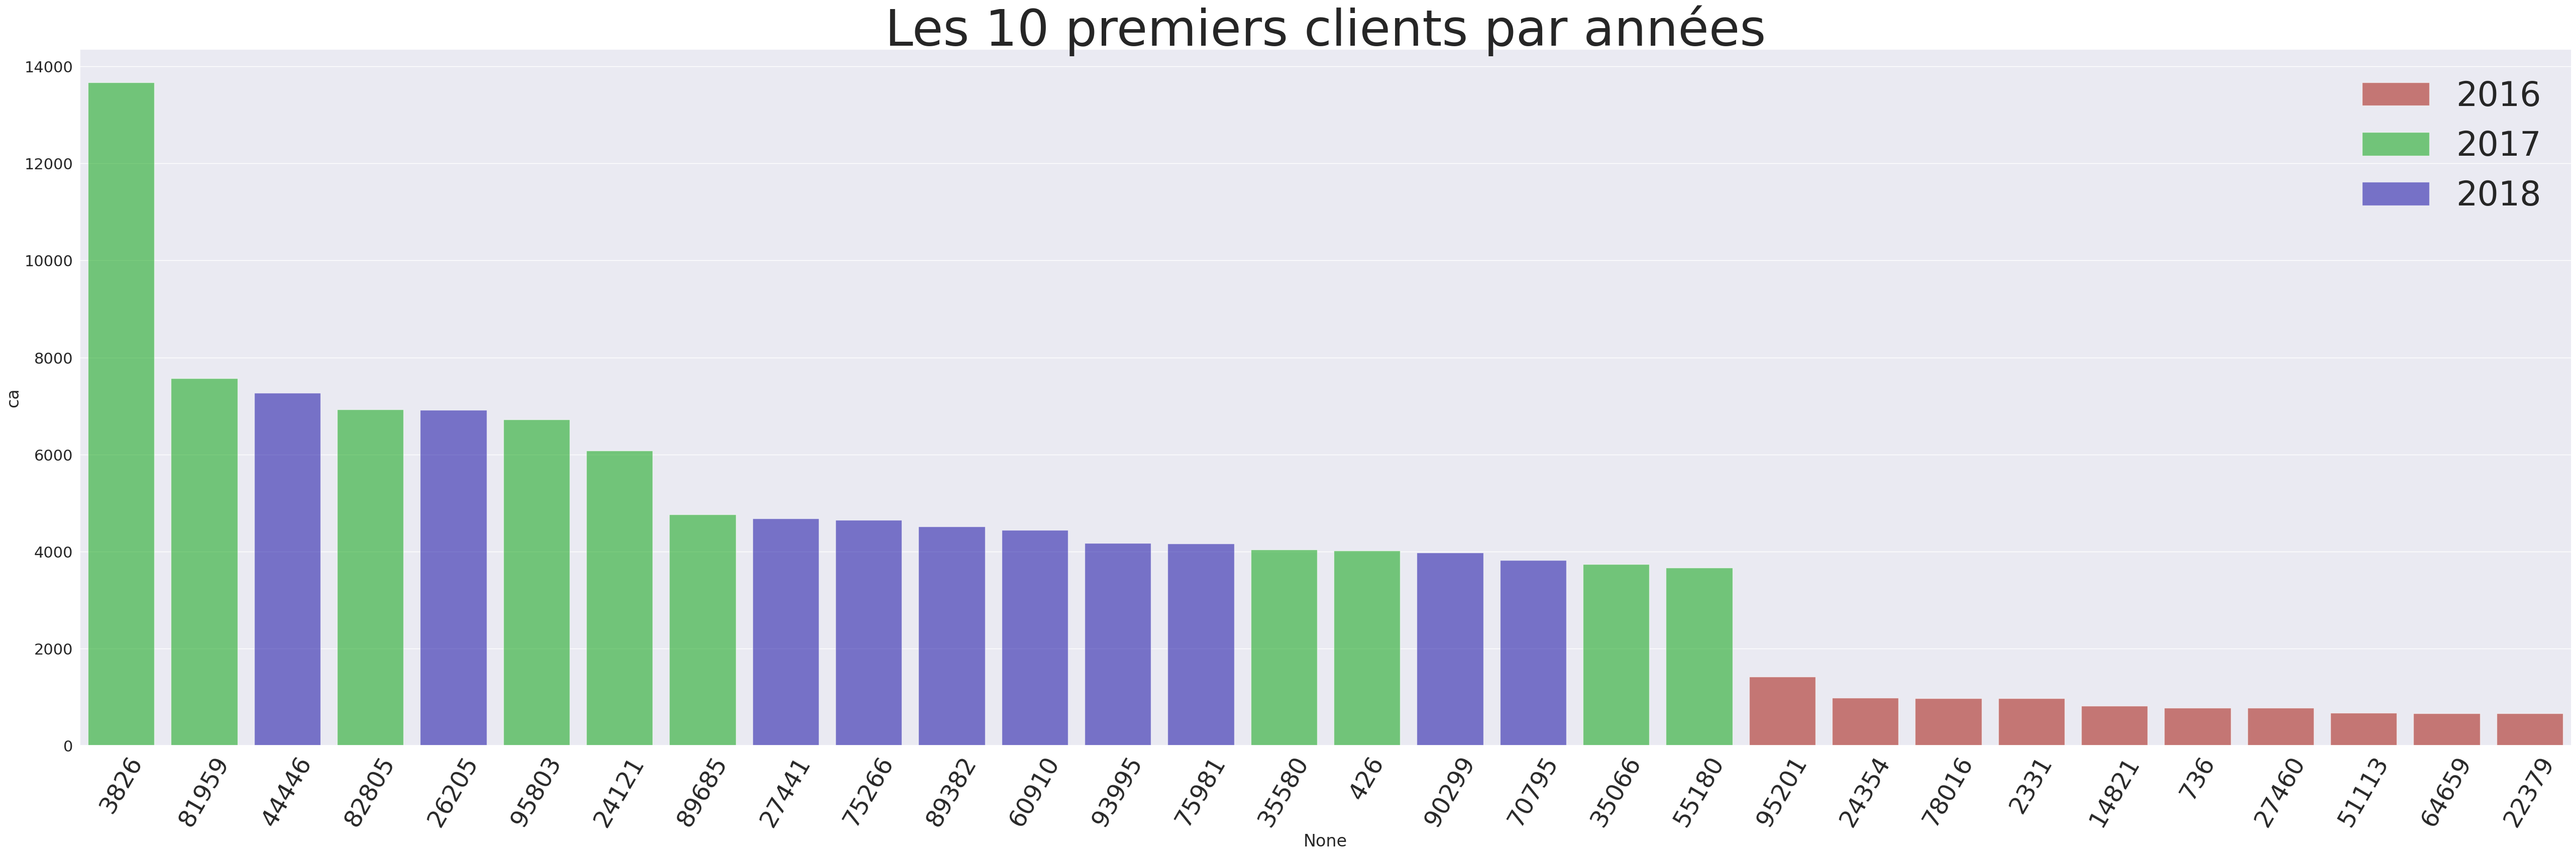

In [17]:
plt.figure(figsize=(64,18))
d = df01.sort_values('ca',ascending=False)[df01.CA_R < 11].reset_index(drop=True)
graph = sns.barplot(x=d.index, 
               y='ca',
               hue='annee',
               data=d,
               palette=sns.hls_palette(3, l=.4, s=.9),
               alpha=0.6,
               );
graph.set_title("Les 10 premiers clients par années", fontsize = 72);
graph.set_xticklabels(d.client,fontsize='x-large', rotation=60);
graph.legend(fontsize=48);
sauvegarderImageSNS(graph, "Les 10 premiers clients par années")

## b. Les clients les plus contents dans le temps

In [18]:
df01 = donnees[donnees.order_status == 'delivered'].groupby(['annee','client']).agg({'notetotale':np.sum}).reset_index()
df01.head()

,annee,client,notetotale
0,2016,74,4
1,2016,736,5
2,2016,2331,4
3,2016,2527,5
4,2016,3103,3


In [19]:
df01['Note_R']      = df01.groupby(['annee']).notetotale.rank(method='dense',ascending=False).astype('int16')

In [20]:
df01.sort_values(['annee','Note_R']).head()

,annee,client,notetotale,Note_R
13,2016,5576,20,1
125,2016,45900,11,2
1,2016,736,5,3
3,2016,2527,5,3
5,2016,3369,5,3


### Les 2 premiers clients suivant l'évaluation par années

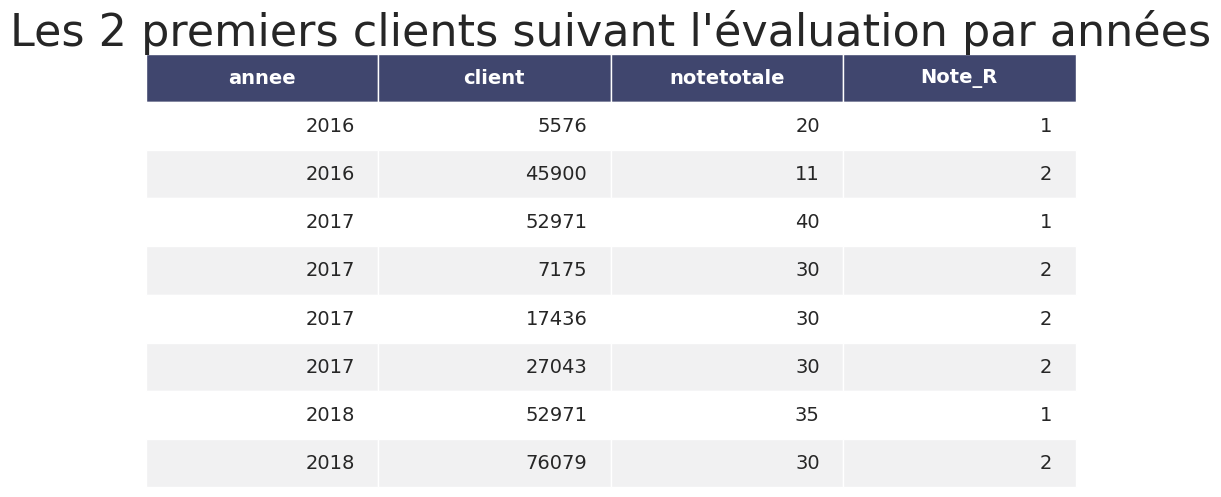

In [21]:
render_mpl_table(df01.sort_values(['annee','Note_R'])[df01.Note_R < 3], 
                 header_columns=0, 
                 col_width=3.0, 
                 fichierPdf = pdf,
                 titre= "Les 2 premiers clients suivant l'évaluation par années");

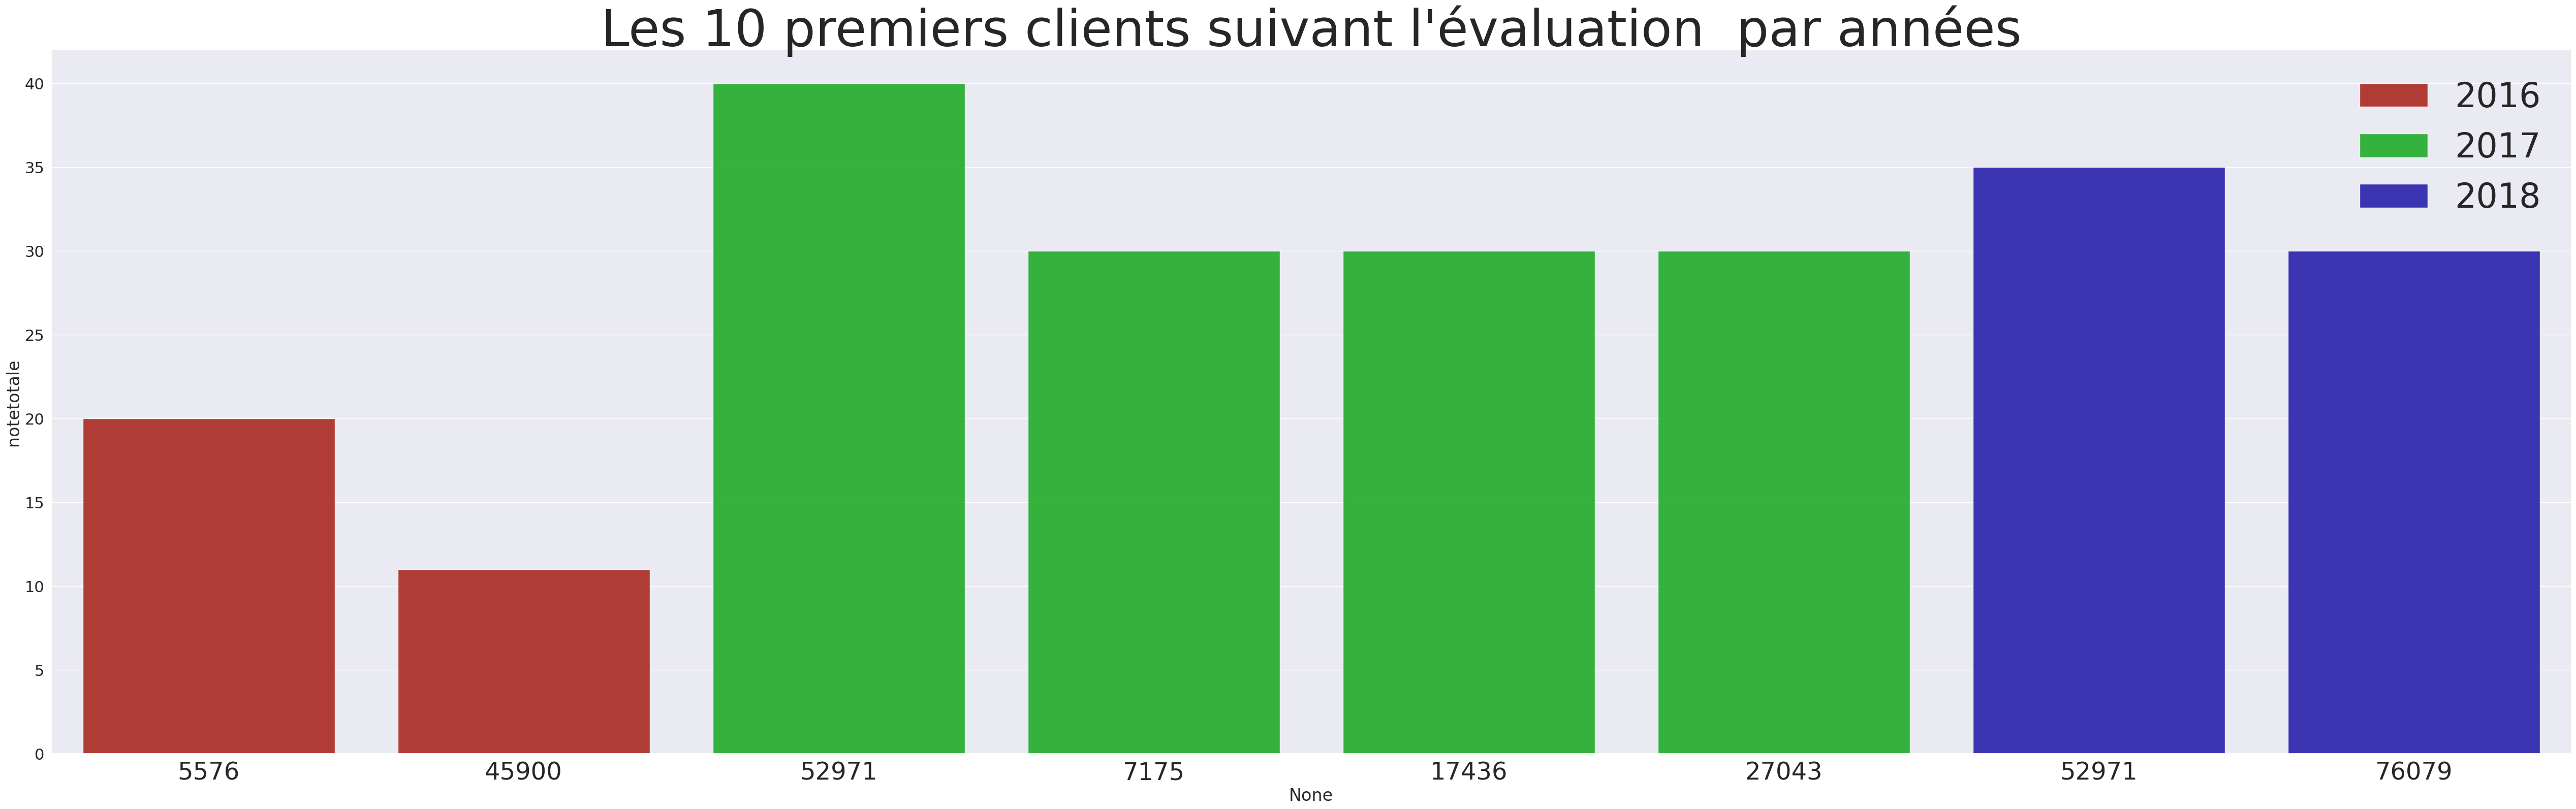

In [22]:
plt.figure(figsize=(64,18))
d = df01.sort_values(['annee','Note_R'])[df01.Note_R < 3].reset_index(drop=True)
graph = sns.barplot(x=d.index, 
               y='notetotale',
               hue='annee',
               data=d,
               palette=sns.hls_palette(3, l=.4, s=.9),
               alpha=0.9,
               );
graph.set_title("Les 10 premiers clients suivant l'évaluation  par années", fontsize = 72);
graph.set_xticklabels(d.client,fontsize='x-large', rotation=0);
graph.legend(fontsize=48);
sauvegarderImageSNS(graph, "Les 10 premiers clients suivant l'évaluation  par années")

## c. Les meilleures notes et les pires dans le temps.

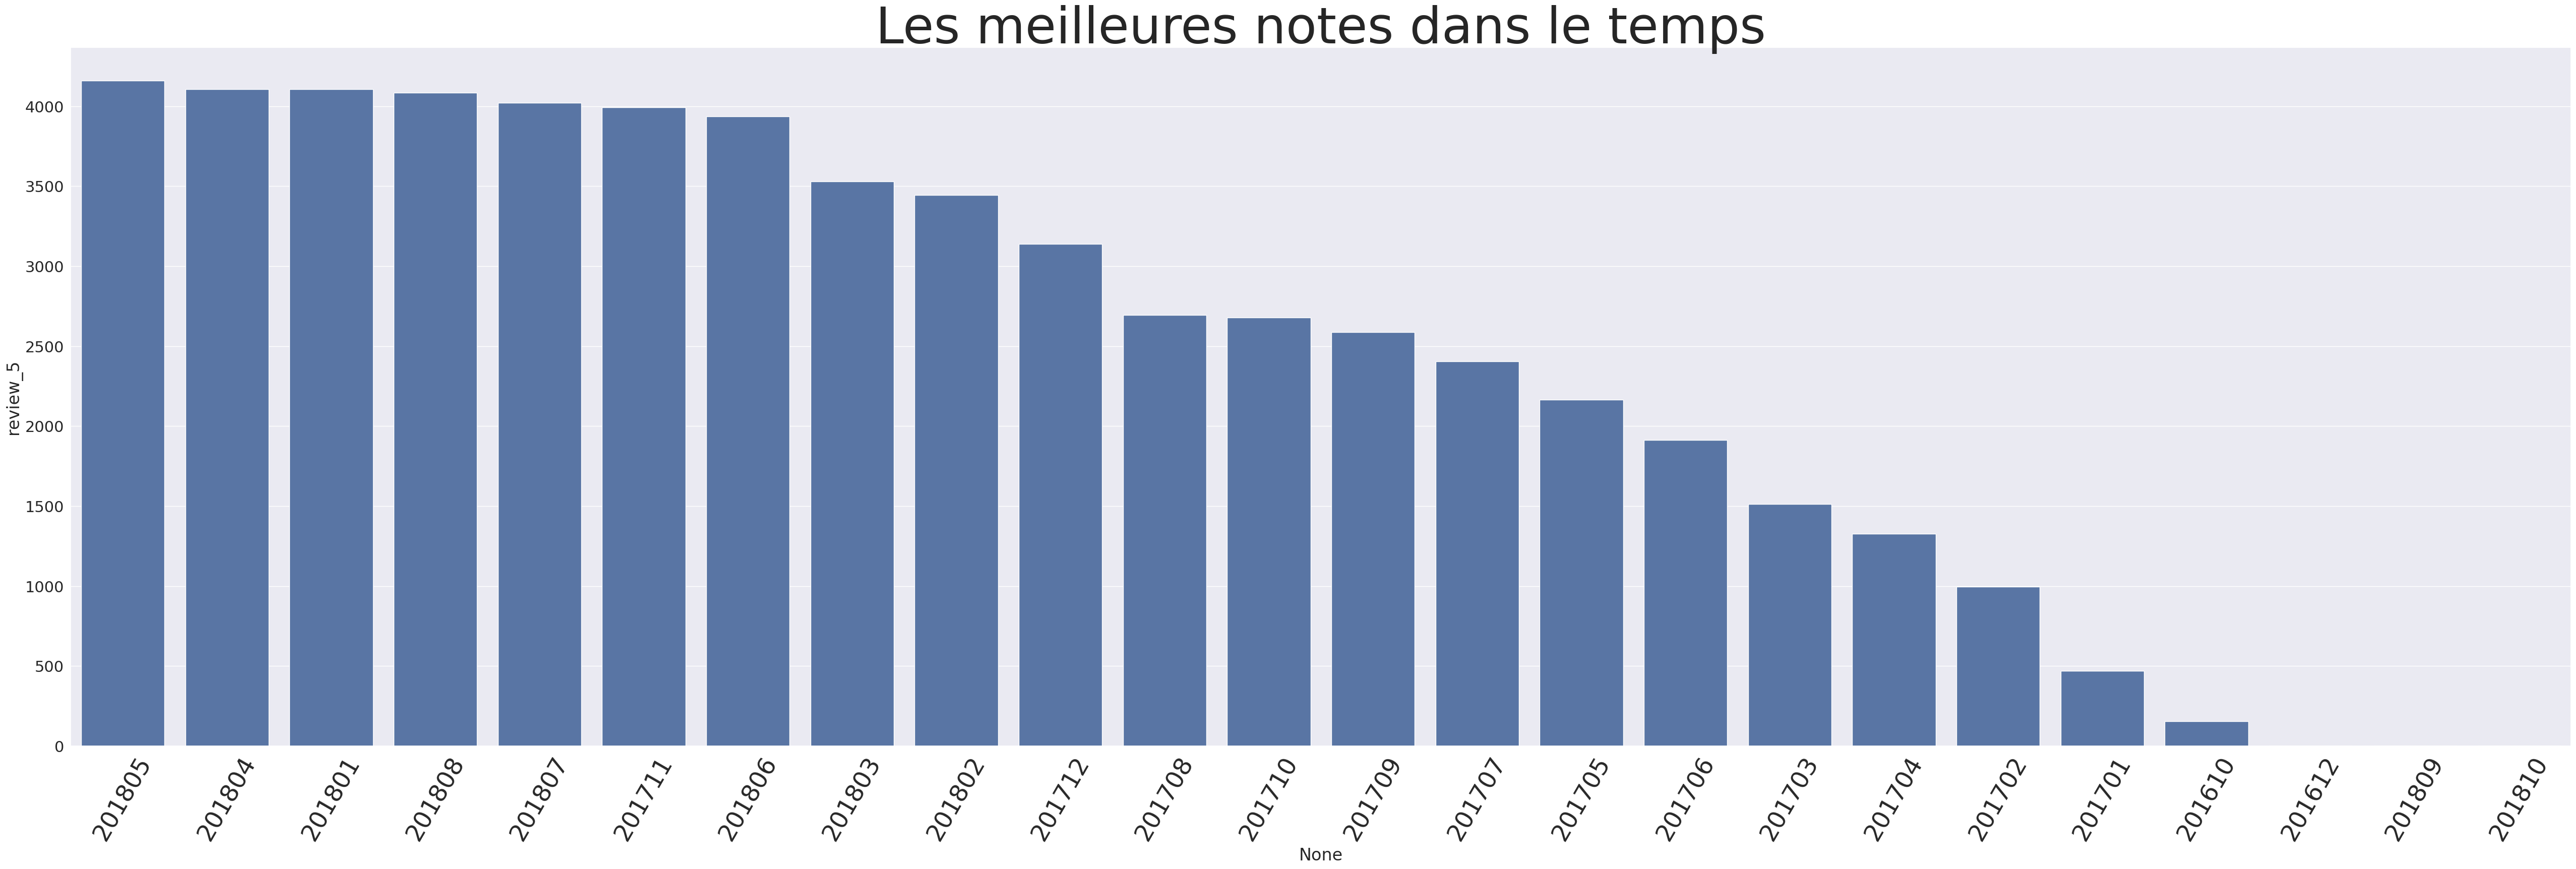

In [23]:
plt.figure(figsize=(64,18))
d = donnees[donnees.review_5 > 0].groupby(['annee_mois']).agg({'review_5':sum}).reset_index()
d = d.sort_values('review_5',ascending=False).reset_index(drop=True)
graph = sns.barplot(x=d.index, 
               y='review_5',                    
               data=d,
               estimator=np.sum     
               );
graph.set_title("Les meilleures notes dans le temps", fontsize = 72);
graph.set_xticklabels(d.annee_mois,fontsize='x-large', rotation=60);
sauvegarderImageSNS(graph, "Les meilleures notes dans le temps")

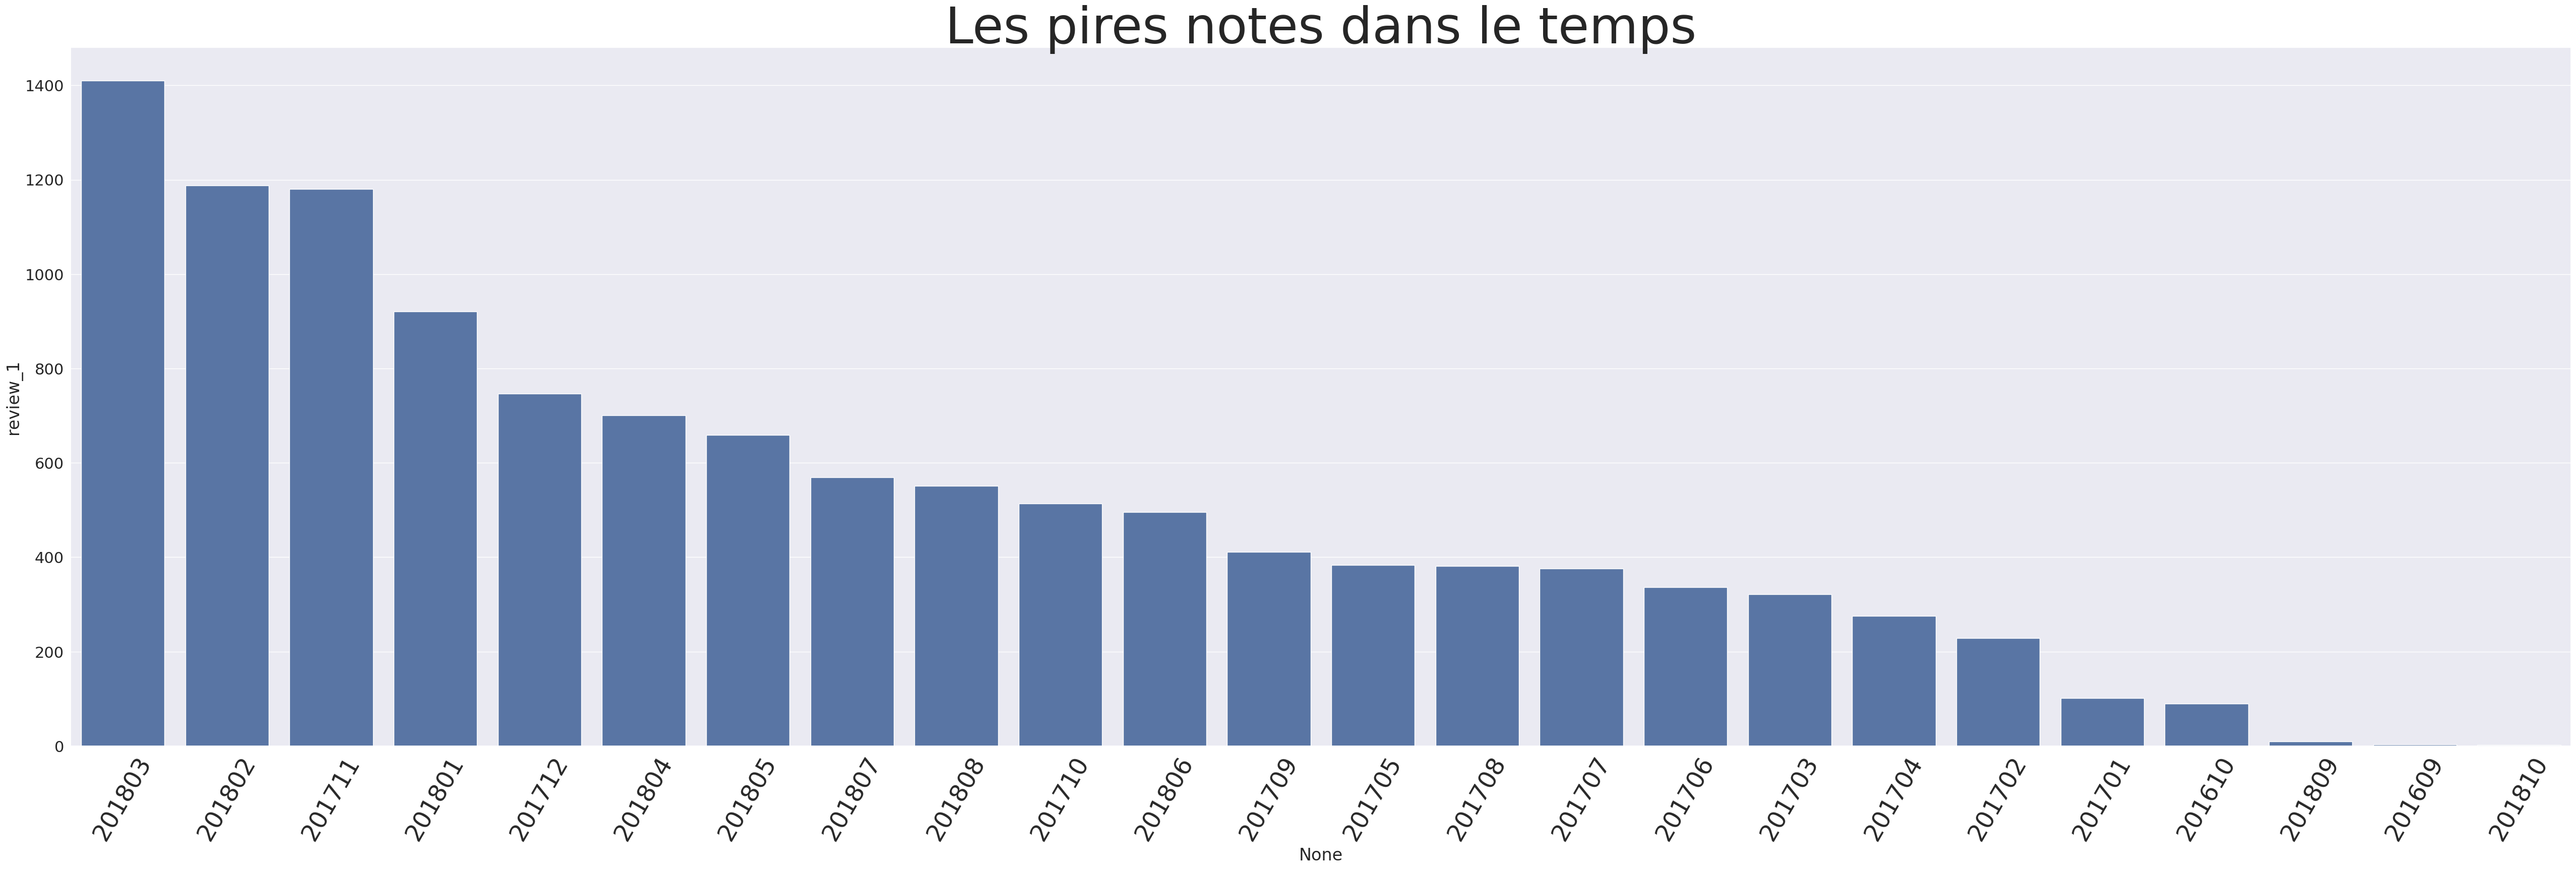

In [24]:
plt.figure(figsize=(64,18))
d = donnees[donnees.review_1 > 0].groupby(['annee_mois']).agg({'review_1':sum}).reset_index()
d = d.sort_values('review_1',ascending=False).reset_index(drop=True)
graph = sns.barplot(x=d.index, 
               y='review_1',                    
               data=d,
               estimator=np.sum     
               );
graph.set_title("Les pires notes dans le temps", fontsize = 72);
graph.set_xticklabels(d.annee_mois,fontsize='x-large', rotation=60);
sauvegarderImageSNS(graph, "Les pires notes dans le temps")

In [25]:
d = donnees.groupby(['annee_mois'])\
       .agg({'review_1':sum,'review_2':sum,'review_3':sum,'review_4':sum,'review_5':sum})\
       .stack()\
       .to_frame()\
       .reset_index()\
       .rename(columns={0:"Valeur","level_1":"Variables"})
d.head()

,annee_mois,Variables,Valeur
0,201609,review_1,3
1,201609,review_2,0
2,201609,review_3,0
3,201609,review_4,0
4,201609,review_5,0


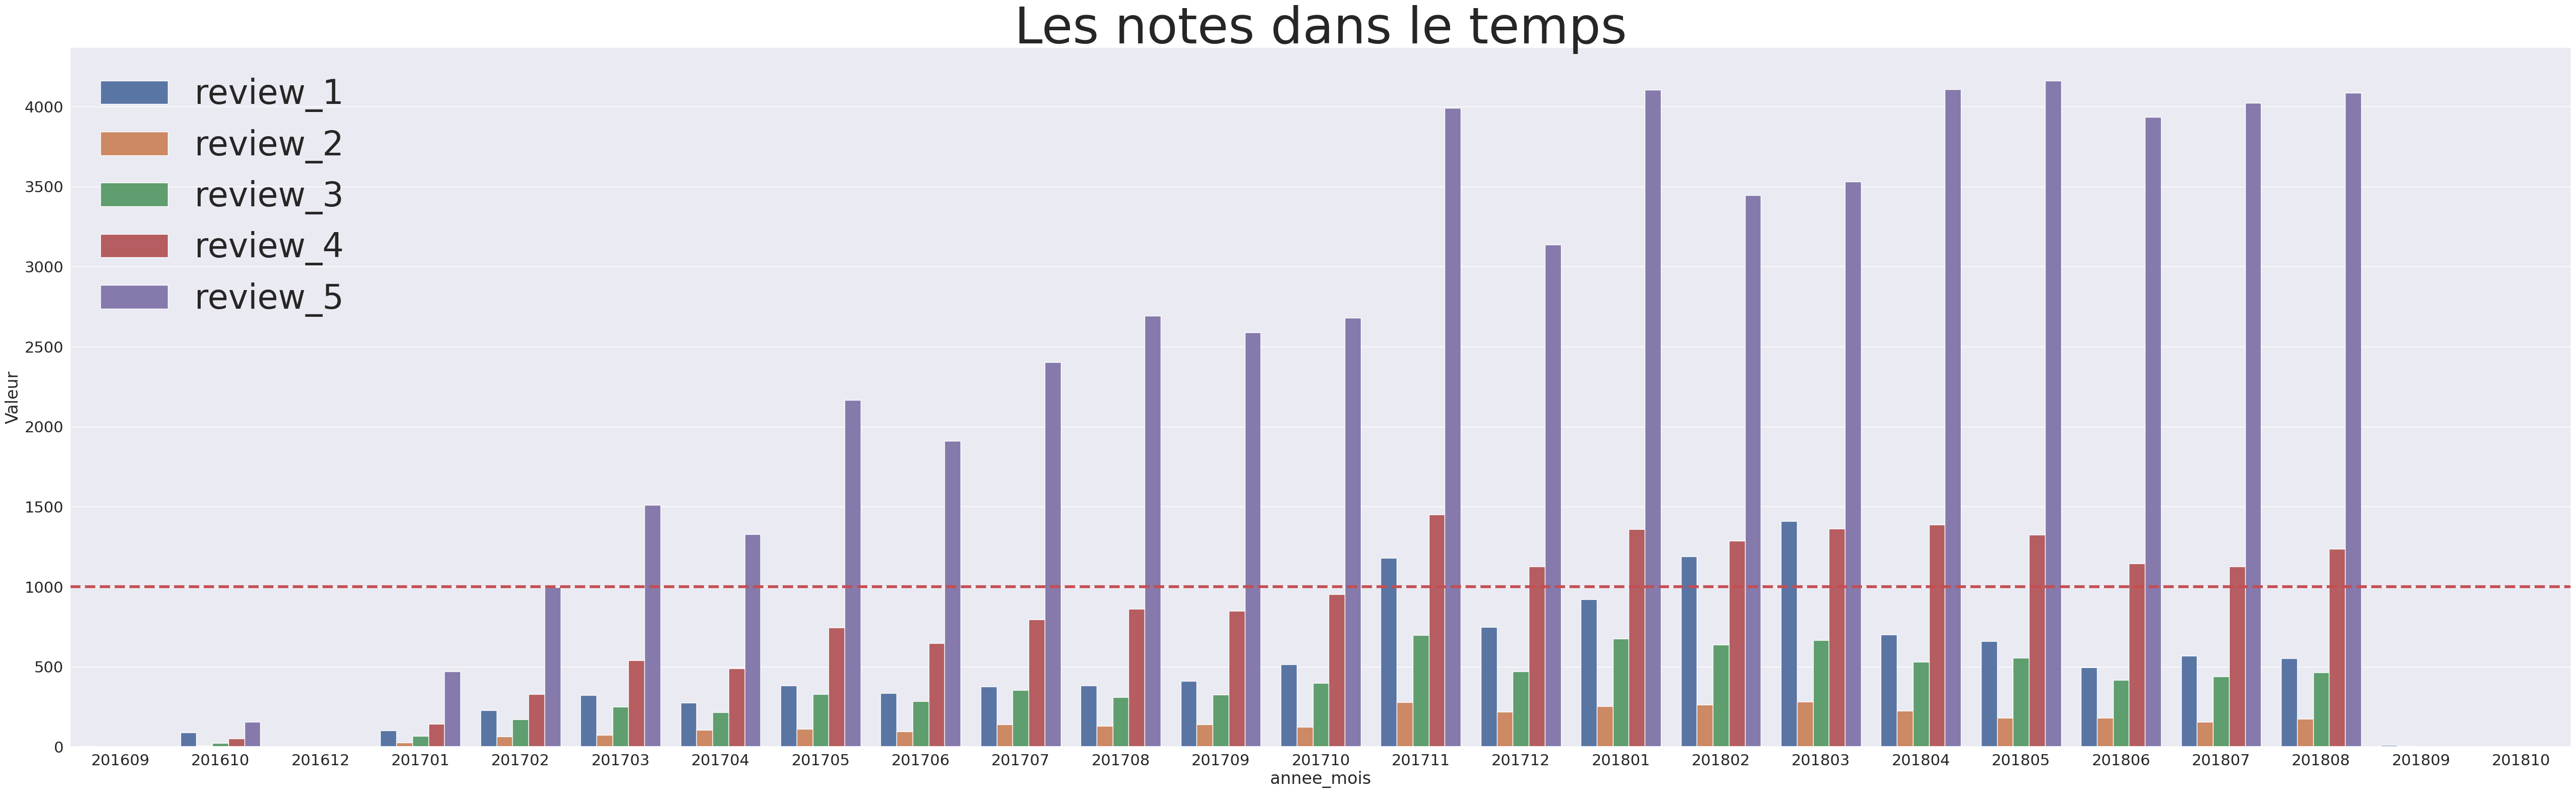

In [26]:
plt.figure(figsize=(64,18))

graph = sns.barplot(x='annee_mois', 
               y='Valeur',  
               hue='Variables',
               data=d,
               estimator=np.sum     
               );
graph.set_title("Les notes dans le temps", fontsize = 72);
#graph.set_xticklabels(d.annee_mois,fontsize='x-large', rotation=60);
graph.legend(fontsize=48);
graph.axhline(1000, 0, 1, linewidth=4, ls='--', color='r');
# sauvegarderImageSNS(graph, "Les notes dans le temps")

## d. Les villes et les régions les plus rentables dans le temps.

### d. Les régions les plus rentables dans le temps.

In [27]:
d = donnees[donnees.annee > 2016]\
           .groupby(['annee','etat'])\
           .agg({'ca':'sum','order_id':'count','notetotale':'sum'})\
           .reset_index()
d = d.sort_values(['annee','ca'],ascending=False).reset_index(drop=True)

In [28]:
d['CA_R']      = d.ca.rank(method='dense',ascending=False)

In [29]:
d.head()

,annee,etat,ca,order_id,notetotale,CA_R
0,2018,SAO PAULO,1.281914e+06,9120,38179,1.0
1,2018,RIO DE JANEIRO,5.747539e+05,3503,13570,3.0
2,2018,BELO HORIZONTE,2.392965e+05,1555,6388,5.0
3,2018,BRASILIA,1.965770e+05,1213,4995,6.0
4,2018,CURITIBA,1.455132e+05,864,3614,9.0


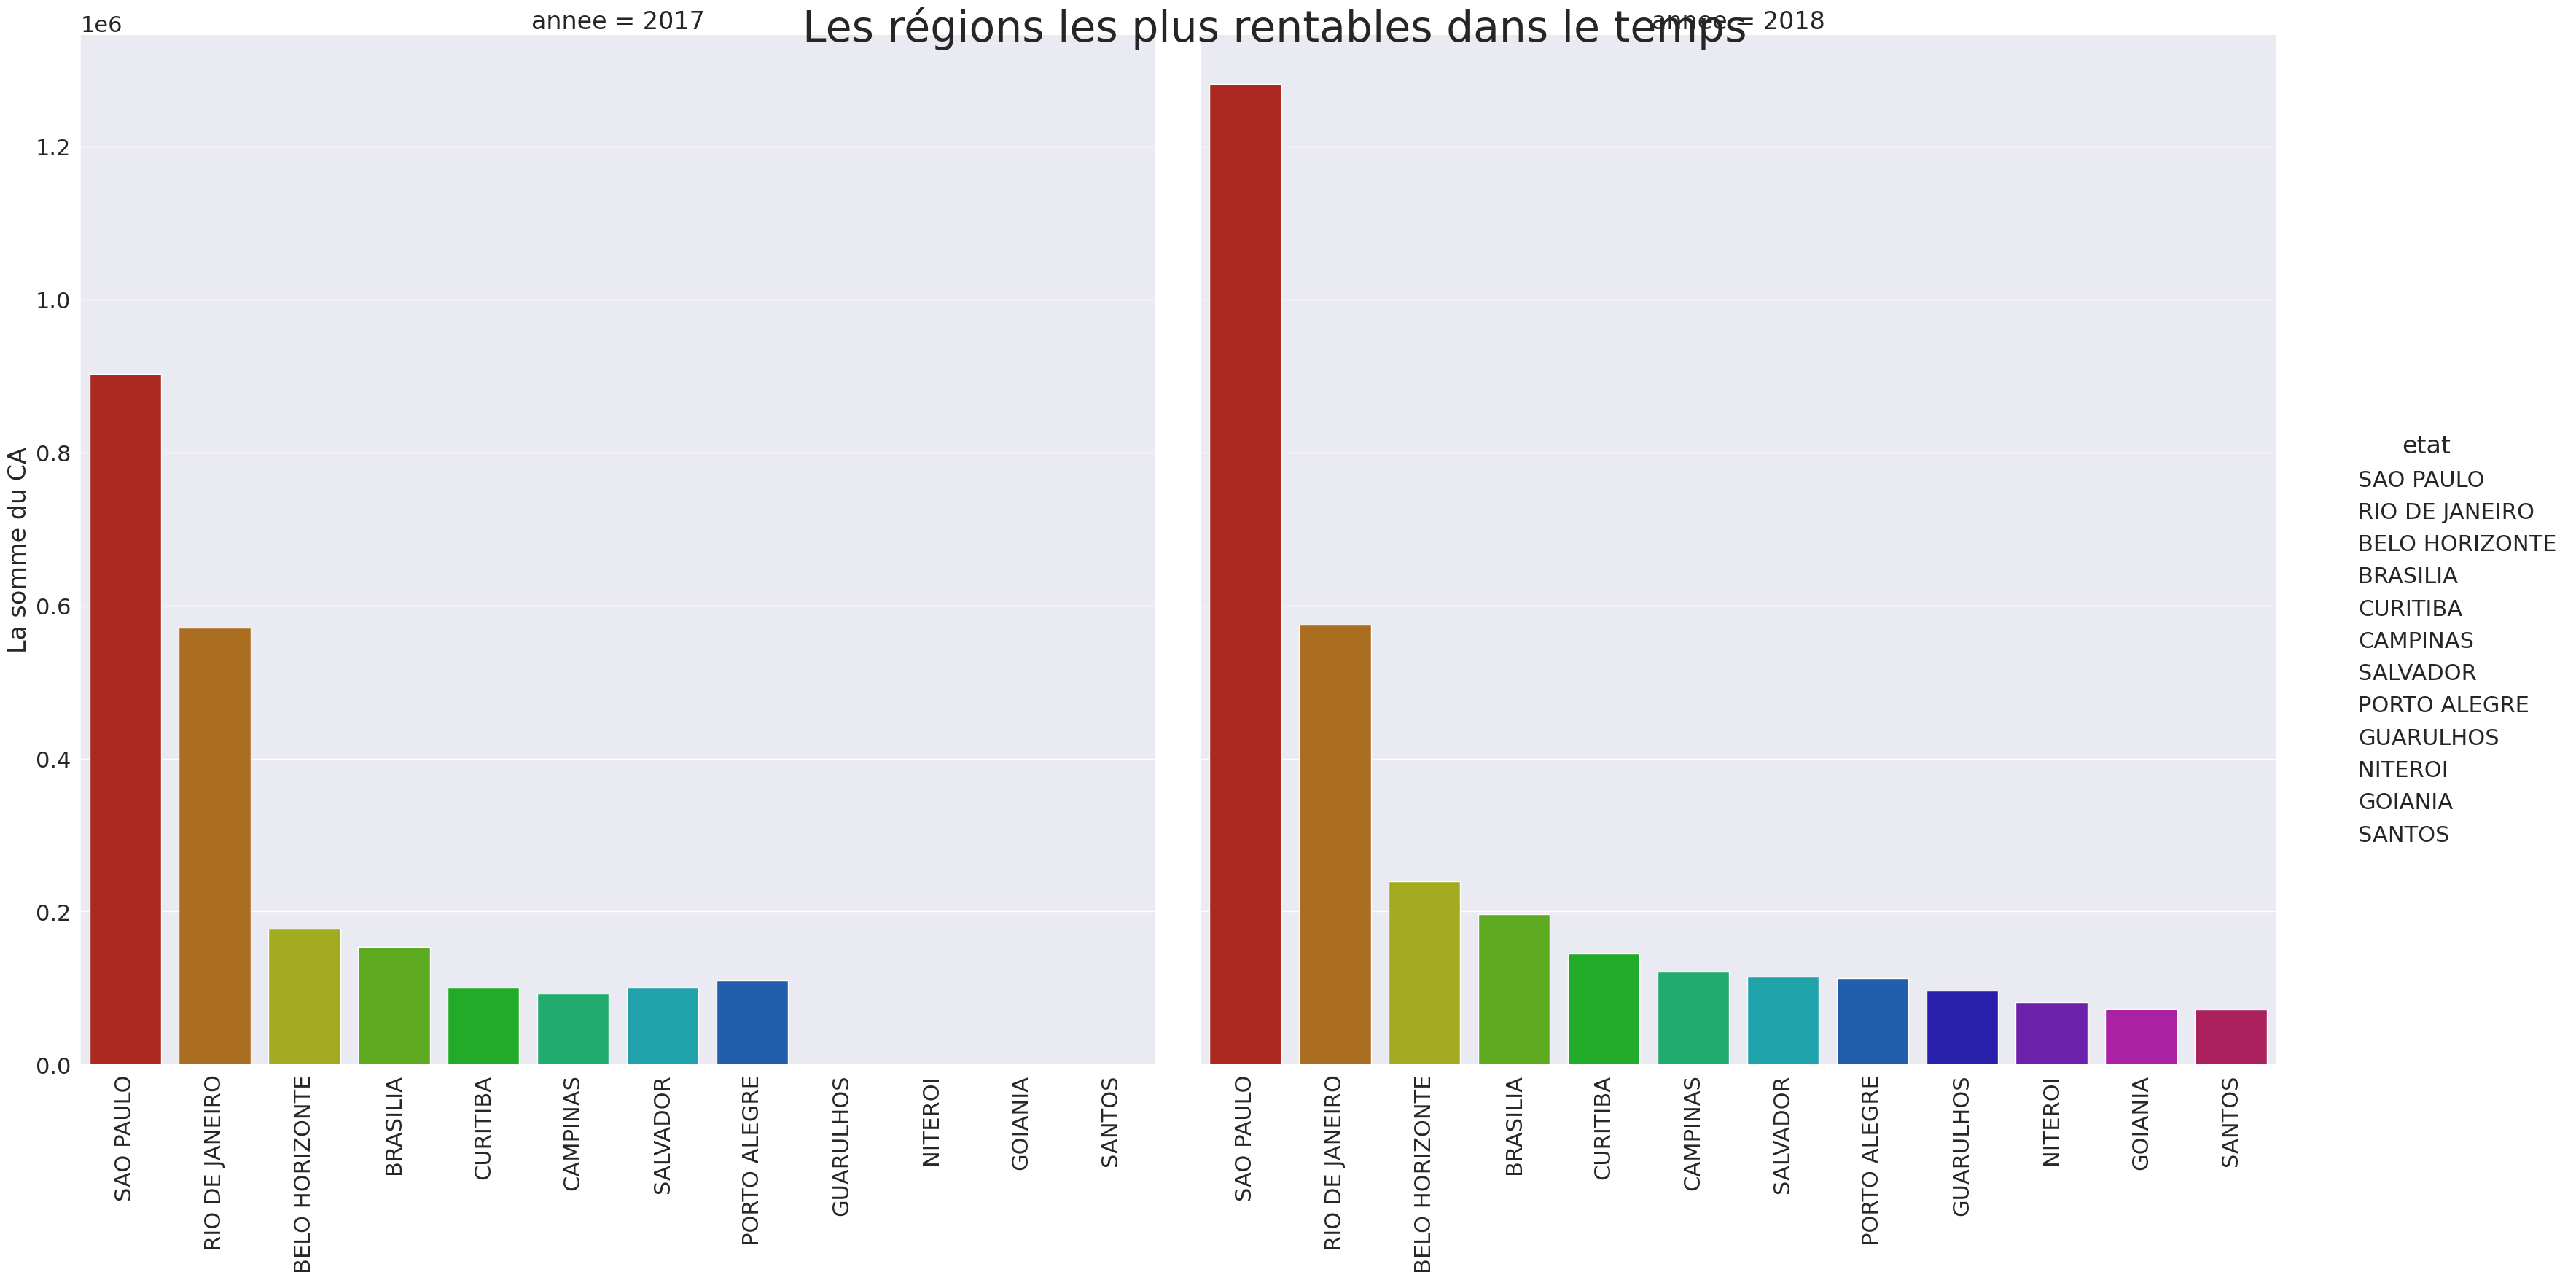

In [30]:
graph = sns.catplot( x="etat", 
                     y="ca", 
                     col="annee", 
                     data=d[d.CA_R < 21],
                     height=16, 
                     kind="bar", 
                     aspect=1,
                     palette=sns.hls_palette(d[d.CA_R < 21].etat.unique().size, l=.4, s=.9),
                     );
graph.set_xticklabels(rotation=90);
graph.set_xlabels('');
graph.set_ylabels("La somme du CA");
graph.fig.suptitle("Les régions les plus rentables dans le temps", fontsize = 42);
sauvegarderImage("Les régions les plus rentables dans le temps")

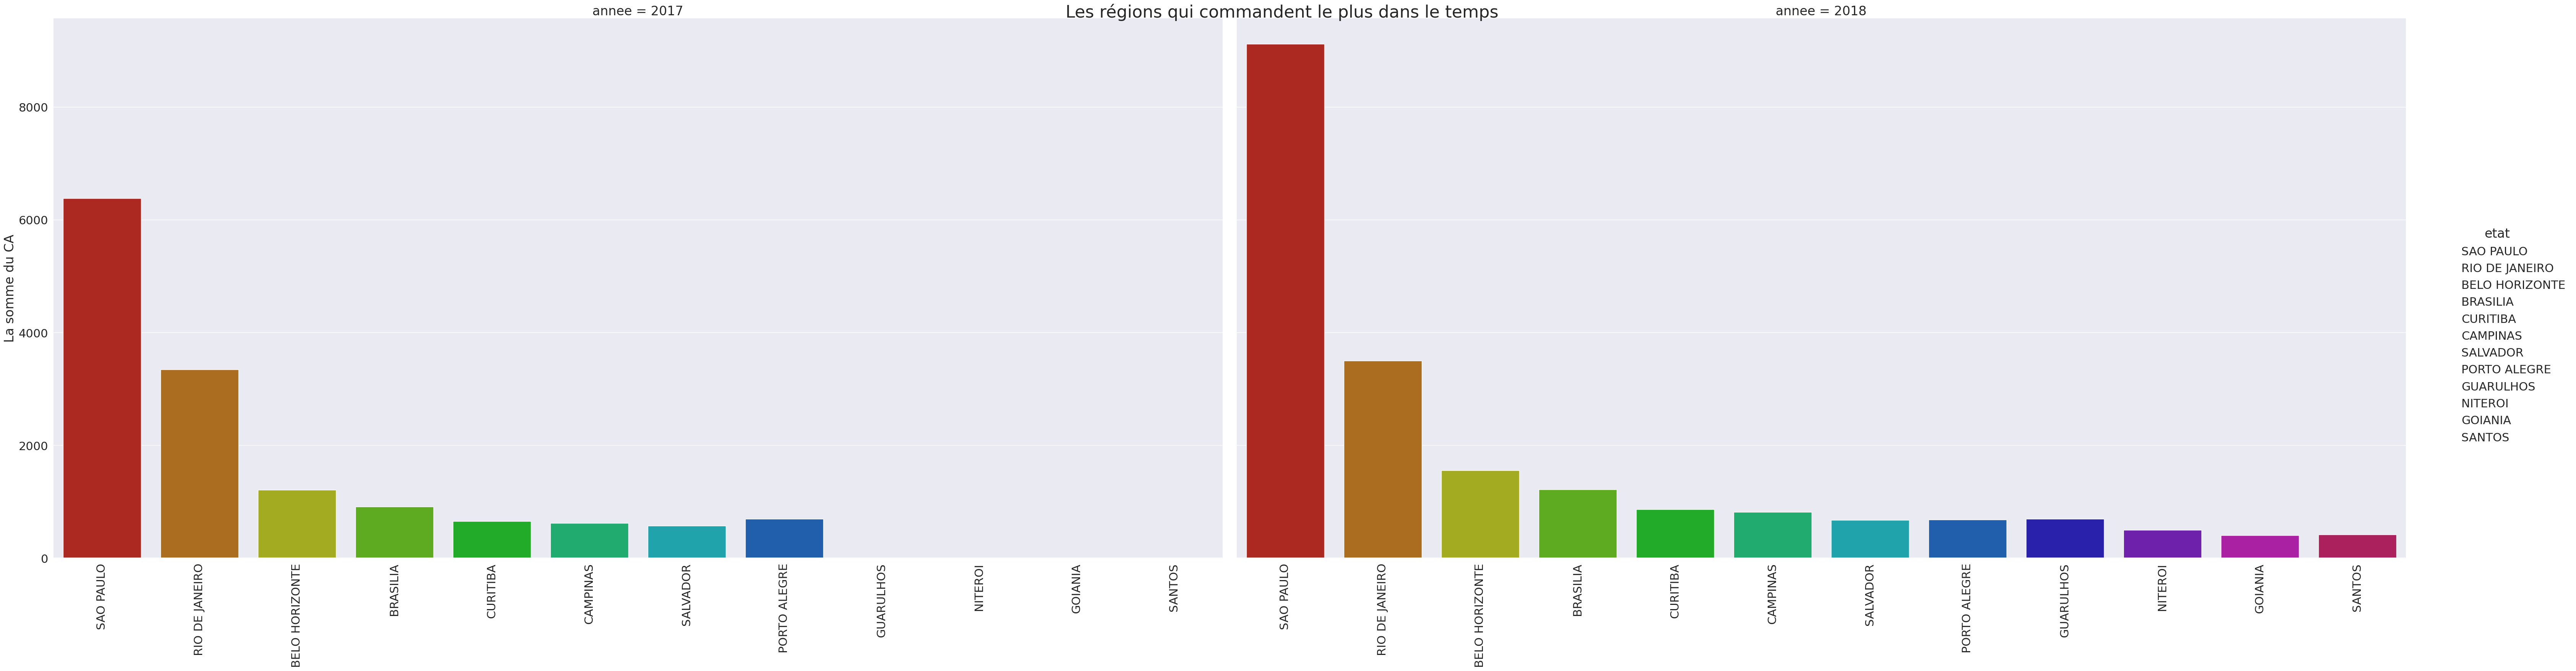

In [31]:
graph = sns.catplot( x="etat", 
                     y="order_id", 
                     col="annee", 
                     data=d[d.CA_R < 21],
                     height=16, 
                     kind="bar", 
                     aspect=2,
                     palette=sns.hls_palette(d[d.CA_R < 21].etat.unique().size, l=.4, s=.9),
                     );
graph.set_xticklabels(rotation=90);
graph.set_xlabels('');
graph.set_ylabels("La somme du CA");
graph.fig.suptitle("Les régions qui commandent le plus dans le temps", fontsize = 32);
# sauvegarderImage("Les régions qui commandent le plus dans le temps")

### d. Les villes les plus rentables dans le temps.

In [32]:
donnees.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_1', 'review_2', 'review_3', 'review_4', 'review_5', 'answer1',
       'answer2', 'answer3', 'answer4', 'answer5', 'comment_message1',
       'comment_message2', 'comment_message3', 'comment_message4',
       'comment_message5', 'creation1', 'creation2', 'creation3', 'creation4',
       'creation5', 'installments_boleto', 'installments_credit_card',
       'installments_debit_card', 'installments_voucher', 'value_boleto',
       'value_credit_card', 'value_debit_card', 'value_voucher',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'annee', 'mois', 'annee_mois', 'jour', 'annee_jour',
       'jour_semaine', 'trimestre', 'annee_trimestre', 'semaine',
       'annee_semaine', 'heure', 'approuvee', 'envoyee', 'livree',

In [33]:
df01 = donnees[donnees.annee > 2016]\
           .groupby(['annee','ville'])\
           .agg({'ca':'sum'})\
           .reset_index()

In [34]:
df01['CA_R']      = df01.ca.rank(method='dense',ascending=False).astype('int16')
df01['CA_pct_R']  = (df01.ca.rank(pct=True,ascending=False)*100).round(2)
df01['pct']       = (df01.ca * 100 /  df01.ca.sum()).round(2)

In [35]:
df01 = df01.sort_values('CA_R').reset_index(drop=True)

In [41]:
df01.ca.median(),df01.ca.min()

(362.4, 13.286666666666667)

In [46]:
df01[df01.CA_R < n].ca.mean()

265813.6083193906

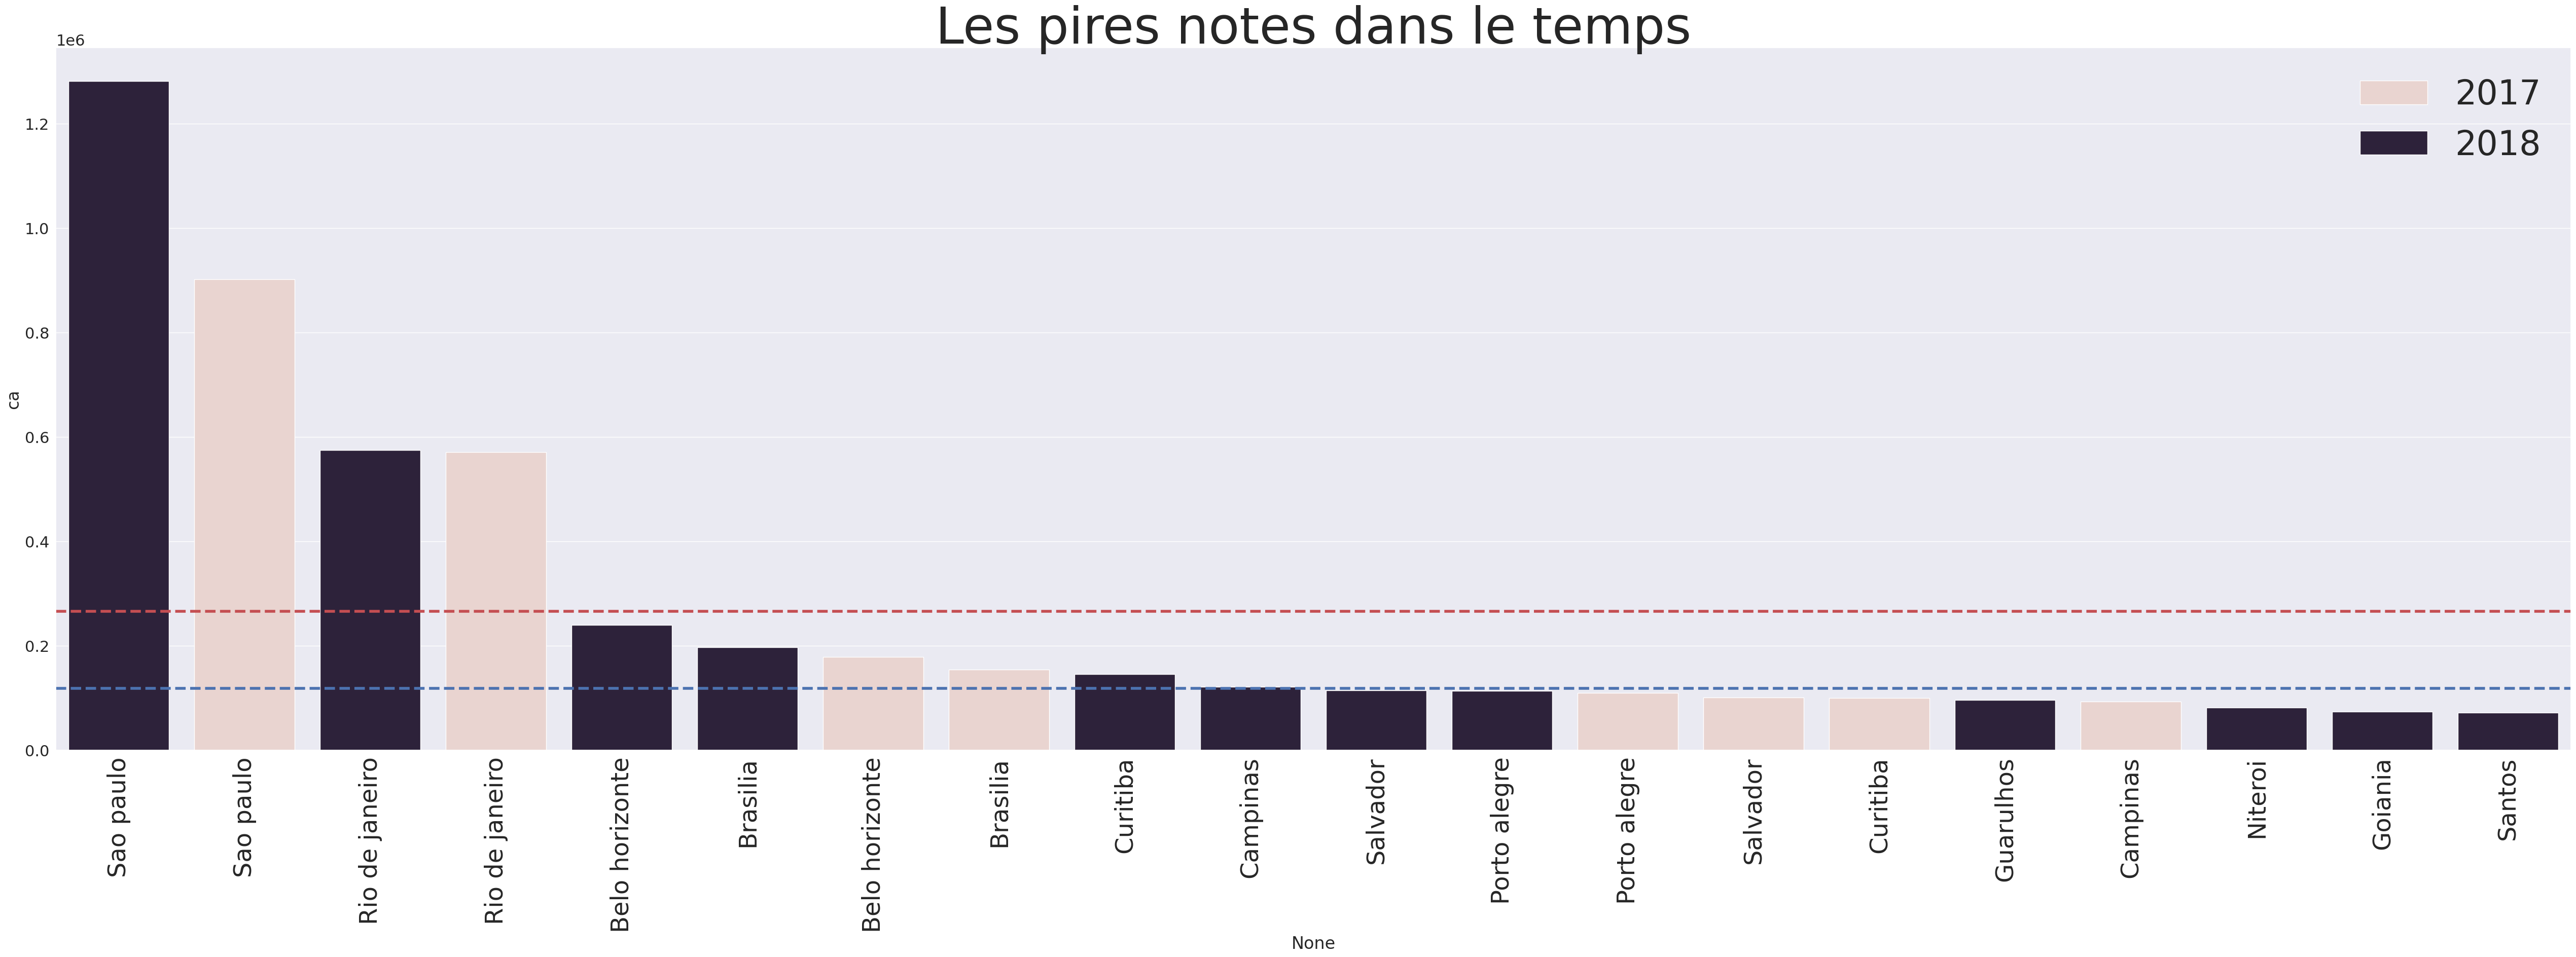

In [50]:
plt.figure(figsize=(64,18))
n = 21
graph = sns.barplot(x=df01[df01.CA_R < n].index, 
               y='ca',  
               hue='annee',
               data=df01[df01.CA_R < n],
               estimator=np.sum     ,
               # palette=palette
               );
graph.set_title("Les pires notes dans le temps", fontsize = 72);
graph.set_xticklabels(df01[df01.CA_R < n].ville,fontsize='x-large', rotation=90);
graph.legend(fontsize=48);
graph.axhline(df01[df01.CA_R < n].ca.mean(), 0, 1, linewidth=4, ls='--', color='r');
graph.axhline(df01[df01.CA_R < n].ca.median(), 0, 1, linewidth=4, ls='--', color='b');
sauvegarderImageSNS(graph, "Les pires notes dans le temps")   

In [37]:
pdf.close()